In [43]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.metrics import accuracy_score, precision_score, f1_score,confusion_matrix, ConfusionMatrixDisplay

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import neattext.functions as nfx
import matplotlib.pyplot as plt

In [3]:
#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('emotion_dataset_raw.csv')

In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
df.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

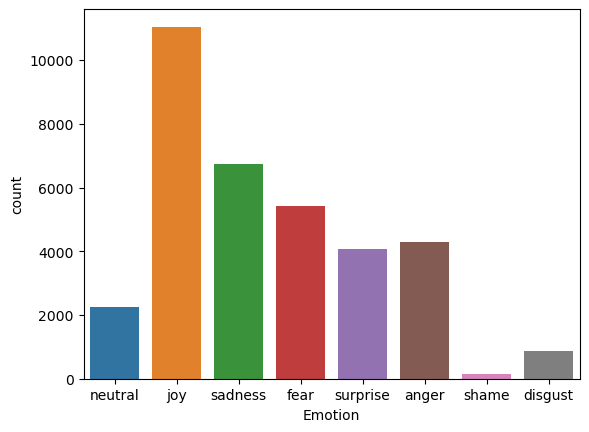

In [8]:
sns.countplot(x = 'Emotion', data = df)
plt.show()

# Data Preperation

 Data Cleaning

In [9]:
df['Cleaned_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [10]:
df.head()

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz for u .! babe naamazed ...


In [11]:
df['Cleaned_Text'] = df['Cleaned_Text'].apply(nfx.remove_stopwords)
df.head()

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...


In [12]:
df['Cleaned_Text'] = df['Cleaned_Text'].apply(nfx.remove_special_characters)
df.head()

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...


In [13]:
#Features nd labels
X_features = df['Cleaned_Text'] 
y_labels = df['Emotion']

In [14]:
X_train, X_text,Y_train, Y_test = train_test_split(X_features,y_labels,test_size=0.3, random_state=42)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
Pipeline_logreg = Pipeline(steps = [('cv',CountVectorizer()),('logistic', LogisticRegression(solver='lbfgs', max_iter=3000))])

In [17]:
Pipeline_logreg.fit(X_train,Y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('logistic', LogisticRegression(max_iter=3000))])

In [18]:
Pipeline_logreg.score(X_text, Y_test)

0.6222456409273808

In [19]:
Pipeline_logreg.predict(['Im so happy today'])

array(['joy'], dtype=object)

In [20]:
Pipeline_logreg.predict_proba(['Im so happy today'])

array([[3.57938767e-03, 3.89319630e-03, 6.95358284e-03, 8.66264360e-01,
        1.33014043e-03, 5.35950888e-02, 1.11310827e-04, 6.42729332e-02]])

In [21]:
Pipeline_logreg.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [24]:
Y_pred = Pipeline_logreg.predict(X_text)

In [25]:
accuracy_score(Y_test, Y_pred)

0.6222456409273808

In [28]:
f1_score(Y_test, Y_pred,average='micro')

0.6222456409273808

In [29]:
precision_score(Y_test, Y_pred,average='micro')


0.6222456409273808

In [34]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 707,    8,   66,  237,   77,  146,    1,   41],
       [  38,   51,   25,   88,    7,   55,    1,   27],
       [  74,    4, 1070,  233,   40,  147,    0,   77],
       [ 117,    6,  125, 2494,  118,  274,    1,  176],
       [  13,    1,   11,   97,  490,   54,    0,    9],
       [ 123,    9,   96,  471,   67, 1155,    1,   93],
       [   0,    0,    0,    5,    0,    1,   30,    0],
       [  53,    6,   47,  405,   28,  143,    1,  498]], dtype=int64)

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (2).

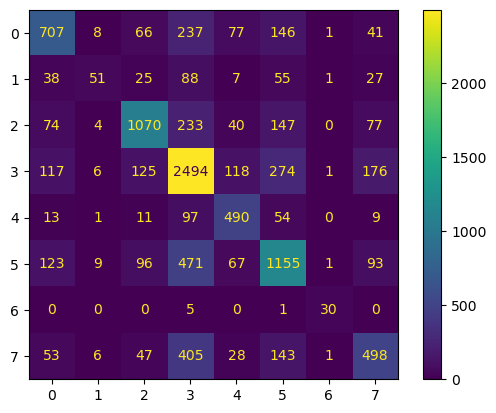

In [40]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
# plt.show()

In [21]:
import joblib
pipeline_file = open('emotion_det_lr_pipe.pkl','wb') 
joblib.dump(Pipeline_logreg,pipeline_file)
pipeline_file.close()

In [24]:
X_text.to_csv('emotion_det_X_test.csv')
Y_test.to_csv('emotion_det_Y_test.csv')

In [65]:
#rough
# /dic={1:["dav","raj","ram"], 2:["hav","gggg","fff"]}
# df = pd.DataFrame(dic)
# df

In [66]:
# df1 = df.T.reset_index()

In [67]:
# df1

In [68]:
# df1.columns = ["no","sci","mat","eng"]

In [69]:
# df1

In [93]:
df1 = df
df1

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY Losing YOU


In [94]:
df1['Emotion'] = '__label__' + df1['Emotion'].astype(str)
df.head(5)

,Emotion,Text,Cleaned_Text
0,__label__neutral,Why ?,
1,__label__joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,__label__sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,__label__joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,__label__joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...


In [97]:
df1['category_description'] = df1['Emotion'] + ' ' + df1['Cleaned_Text']
df

,Emotion,Text,Cleaned_Text,category_description
0,__label__neutral,Why ?,,__label__neutral
1,__label__joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow,__label__joy sage act upgrade list tommorow
2,__label__sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals sh...,__label__sadness way homegirl baby funeral man...
3,__label__joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular featur...,__label__joy eye true hazel eyeand brilliant r...
4,__label__joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e ba...,__label__joy ugh babe hugggzzz u babe naamazed...
...,...,...,...,...
34787,__label__surprise,@MichelGW have you gift! Hope you like it! It'...,gift hope like it hand wear itll warm lol,__label__surprise gift hope like it hand wear ...
34788,__label__joy,The world didnt give it to me..so the world MO...,world didnt meso world definitely cnt away,__label__joy world didnt meso world definitely...
34789,__label__anger,A man robbed me today .,man robbed today,__label__anger man robbed today
34790,__label__fear,"Youu call it JEALOUSY, I call it of #Losing YO...",youu jealousy losing you,__label__fear youu jealousy losing you


In [98]:
import re
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub("[ \n]+", " ", text)
    return text.strip().lower() 

In [99]:
df1['Cleaned_Text'] = df1['Cleaned_Text'].map(preprocess)
df1

,Emotion,Text,Cleaned_Text,category_description
0,__label__neutral,Why ?,,__label__neutral
1,__label__joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow,__label__joy sage act upgrade list tommorow
2,__label__sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals sh...,__label__sadness way homegirl baby funeral man...
3,__label__joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular featur...,__label__joy eye true hazel eyeand brilliant r...
4,__label__joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e ba...,__label__joy ugh babe hugggzzz u babe naamazed...
...,...,...,...,...
34787,__label__surprise,@MichelGW have you gift! Hope you like it! It'...,gift hope like it hand wear itll warm lol,__label__surprise gift hope like it hand wear ...
34788,__label__joy,The world didnt give it to me..so the world MO...,world didnt meso world definitely cnt away,__label__joy world didnt meso world definitely...
34789,__label__anger,A man robbed me today .,man robbed today,__label__anger man robbed today
34790,__label__fear,"Youu call it JEALOUSY, I call it of #Losing YO...",youu jealousy losing you,__label__fear youu jealousy losing you


In [100]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2)

In [101]:
train.to_csv("emotion.train", columns=["category_description"], index=False, header=False)
test.to_csv("emotion.test", columns=["category_description"], index=False, header=False)

In [103]:
import fasttext
model = fasttext.train_supervised(input="emotion.train")
model.test("emotion.test")

(6959, 0.6272452938640609, 0.6272452938640609)

In [104]:
model.predict('i am very happy')

(('__label__joy',), array([0.96808612]))